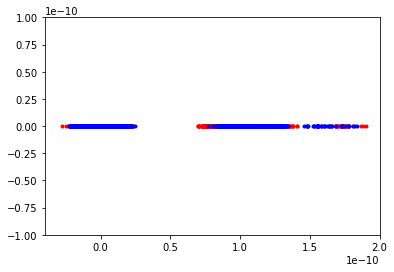

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
run2Bound = pd.read_csv('./run2_1millionLabel.csv')
run1Unbound = pd.read_csv('./run1_1millionLabel.csv')
# Fixing random state for reproducibility
#np.random.seed(19680801)


#y = np.random.rand(N)
y = np.zeros(1000000)
#colors = np.random.rand(1000000)
area = (30 * np.random.rand(6))**2  # 0 to 15 point radii
#plt.scatter(x, y, s=20, c=colors, alpha=0.5)

#fig=plt.figure()
#ax=fig.add_axes([1,1,1,1])
#ax.scatter(Train, y, c='b', vmin=0000.1, vmax=0000.1, alpha=0.1)
plt.plot(run1Unbound['Magnitude'],y,'r.')
plt.plot(run2Bound['Magnitude'],y,'b.')
axes = plt.gca()
axes.set_xlim([-0.00000000004,0.0000000002])
axes.set_ylim([-0.0000000001,0.0000000001])
plt.show()

In [6]:
run1Unbound = run1Unbound[run1Unbound['Magnitude'] > 0.26*pow(10, -11)]
run2Bound = run2Bound[run2Bound['Magnitude'] > 0.26*pow(10, -11)]

In [7]:
run2Bound

,Type,Magnitude
2,Bound,3.440000e-12
8,Bound,5.510000e-12
13,Bound,5.810000e-12
23,Bound,6.770000e-12
28,Bound,2.900000e-12
...,...,...
999988,Bound,4.930000e-12
999992,Bound,6.650000e-12
999993,Bound,4.310000e-12
999994,Bound,4.470000e-12


In [8]:
run1Unbound

,Type,Magnitude
3,Unbound,2.930000e-12
6,Unbound,2.830000e-12
13,Unbound,5.040000e-12
16,Unbound,4.120000e-12
17,Unbound,8.020000e-12
...,...,...
999991,Unbound,5.420000e-12
999992,Unbound,4.990000e-12
999993,Unbound,6.840000e-12
999994,Unbound,6.480000e-12


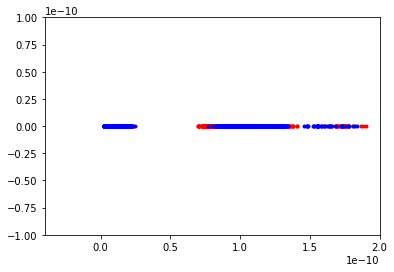

In [9]:
yUnbound = np.zeros(307788)
yBound = np.zeros(306013)

plt.plot(run1Unbound['Magnitude'],yUnbound,'r.')
plt.plot(run2Bound['Magnitude'],yBound,'b.')

axes = plt.gca()
axes.set_xlim([-0.00000000004,0.0000000002])
axes.set_ylim([-0.0000000001,0.0000000001])
plt.show()

# ----


In [10]:
run12Total = pd.read_csv('./run1-2_1millionLabel.csv')


In [11]:
run12Total

,Type,Magnitude
0,Unbound,-4.870000e-12
1,Unbound,-9.090000e-13
2,Unbound,-2.540000e-12
3,Unbound,2.930000e-12
4,Unbound,-4.630000e-12
...,...,...
1999995,Bound,-6.570000e-12
1999996,Bound,-7.440000e-12
1999997,Bound,9.440000e-12
1999998,Bound,-3.500000e-12


In [12]:

run12Total = run12Total[run12Total['Magnitude'] > 0.22*pow(10, -10)]


In [13]:
run12Total

,Type,Magnitude
49921,Unbound,2.270000e-11
53148,Unbound,2.210000e-11
126149,Unbound,1.120000e-10
126150,Unbound,1.180000e-10
126151,Unbound,1.110000e-10
...,...,...
1551817,Bound,1.020000e-10
1551818,Bound,1.020000e-10
1551819,Bound,1.050000e-10
1551820,Bound,9.910000e-11


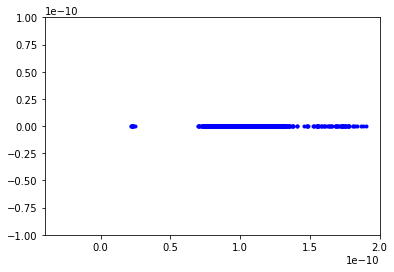

In [14]:
yTotal = np.zeros(14158)

plt.plot(run12Total['Magnitude'], yTotal,'b.')

axes = plt.gca()
axes.set_xlim([-0.00000000004,0.0000000002])
axes.set_ylim([-0.0000000001,0.0000000001])
plt.show()

In [102]:
run12Total

,Type,Magnitude
49921,Unbound,2.270000e-11
53148,Unbound,2.210000e-11
126149,Unbound,1.120000e-10
126150,Unbound,1.180000e-10
126151,Unbound,1.110000e-10
...,...,...
1551817,Bound,1.020000e-10
1551818,Bound,1.020000e-10
1551819,Bound,1.050000e-10
1551820,Bound,9.910000e-11


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(run12Total['Magnitude'], run12Total['Type'], test_size=0.2)

In [188]:
print(X_train)

314830     8.380000e-11
1492444    9.600000e-11
1246737    1.250000e-10
569153     9.210000e-11
1275060    1.130000e-10
               ...     
389958     1.110000e-10
618805     1.080000e-10
306611     1.220000e-10
488677     9.080000e-11
489075     1.000000e-10
Name: Magnitude, Length: 11326, dtype: float64


In [189]:
len(X_test)
X_train = X_train.values.reshape(-1, 1)

In [192]:
X_train

array([[-1.5905788 ],
       [-0.61254272],
       [ 1.71229714],
       ...,
       [ 1.47179647],
       [-1.02941056],
       [-0.29187515]])

In [190]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
#y_train = y_train.to_numpy()

In [203]:
type_label = np.where(y_train =='Bound', 0, 1)

In [249]:
#type_label.astype(int) 
#X_train.astype(float) 
#type_label.dtype
#X.ndim

In [255]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = sc.transform(X_train)

In [256]:
abc = np.c_[ X_train, pow(X_train,2) ]

C:\Users\ertug\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
C:\Users\ertug\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


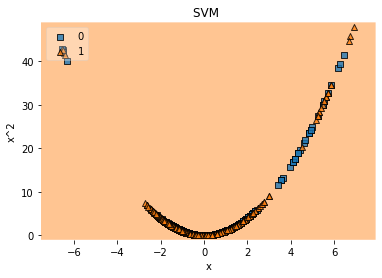

In [257]:
# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(abc, type_label)


# Plotting decision regions
plot_decision_regions(abc, type_label, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('x')
plt.ylabel('x^2')
plt.title('SVM ')
plt.show()

In [267]:
svm.score(X, y)

0.6342927776796751

In [258]:
type_label

array([1, 0, 0, ..., 1, 1, 1])

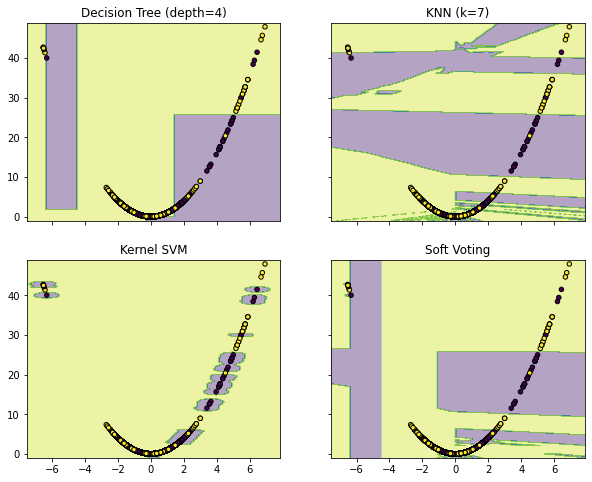

In [260]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = abc
y = type_label

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
#svm.SVC(kernel='rbf', gamma=4, C=25)
clf3 = SVC(kernel='rbf', gamma=4, C=25, probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [238]:
#Xtest = X_test.reshape(-1, 1)
#Xtrain = X_train.reshape(-1, 1)


In [262]:
clf3.score(X, y)

0.6507151686385308

In [263]:
clf1.score(X, y)

0.65371711107187

In [264]:
clf2.score(X, y)

0.6236093943139679

In [265]:
eclf.score(X, y)

0.6525693095532403

In [241]:
#X_train, X_test, y_train, y_test = train_test_split(run12Total['Magnitude'], run12Total['Type'], test_size=0.2)


In [242]:
#X_test = X_test.values.reshape(-1, 1)
#X_train = X_train.values.reshape(-1, 1)

# --------------------------------

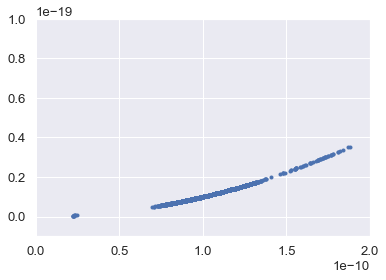

In [873]:

plt.plot(X_train[:, 0], X_train[:, 1],'b.')

axes = plt.gca()
axes.set_xlim([-0.0000000000004,0.0000000002])
axes.set_ylim([-0.00000000000000000001,0.0000000000000000001])
plt.show()

In [834]:
len(X_train)

11326

In [268]:
abc1 = np.c_[ X_train, pow(X_train,3) ]

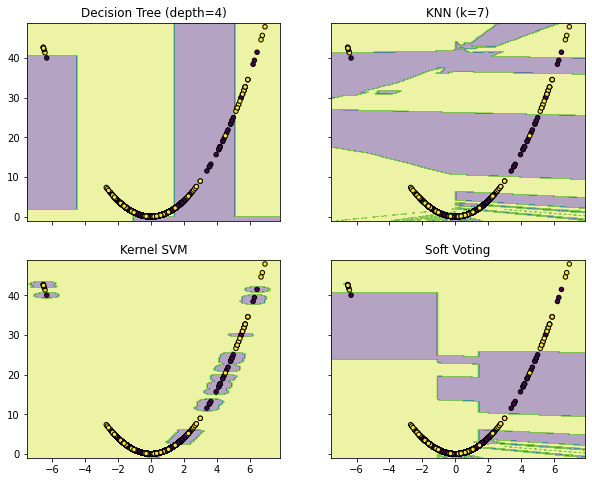

In [269]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = abc
y = type_label

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
#svm.SVC(kernel='rbf', gamma=4, C=25)
clf3 = SVC(kernel='rbf', gamma=4, C=25, probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [270]:
clf3.score(X, y)

0.6507151686385308

In [271]:
clf1.score(X, y)

0.65371711107187

In [272]:
clf2.score(X, y)

0.6236093943139679

In [274]:
eclf.score(X, y)

0.6524810171287303

0.6342927776796751


C:\Users\ertug\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: No contour levels were found within the data range.


0.6412678792159633
0.6523927247042204


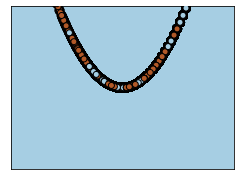

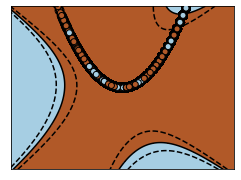

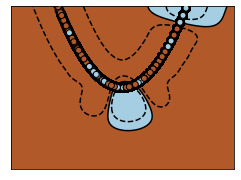

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X = abc
Y = y
# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)
    j = clf.score(X, y)
    print(j)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

Accuracy (train) for L1 logistic: 63.4% 
Accuracy (train) for L2 logistic (Multinomial): 63.4% 
Accuracy (train) for L2 logistic (OvR): 63.4% 
Accuracy (train) for Linear SVC: 63.4% 
Accuracy (train) for GPC: 65.1% 


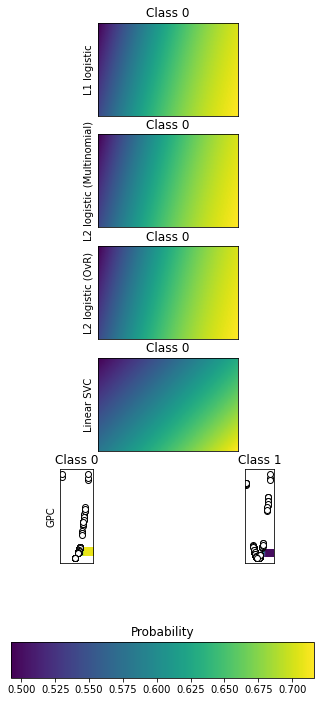

In [280]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets


X = abc

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()